In [24]:
import math

import matplotlib.pyplot as plt
import numpy as np

import skfda
from skfda.misc.hat_matrix import (
    KNeighborsHatMatrix,
    LocalLinearRegressionHatMatrix,
    NadarayaWatsonHatMatrix,
)
from skfda.misc.kernels import uniform, epanechnikov, normal
from skfda.preprocessing.smoothing import KernelSmoother
from skfda.preprocessing.smoothing.validation import SmoothingParameterSearch

In [25]:
dataset = skfda.datasets.fetch_phoneme()


In [26]:
dataset['target']

array([4, 3, 2, ..., 4, 1, 1], dtype=int8)

In [27]:
fd = dataset['data'][:300]


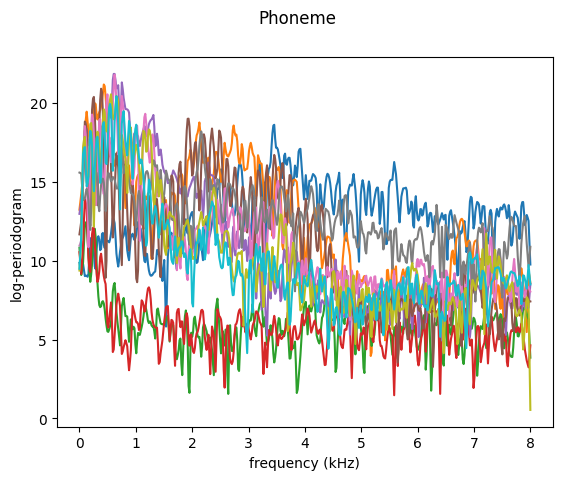

In [28]:

fd[:10].plot()
plt.show()

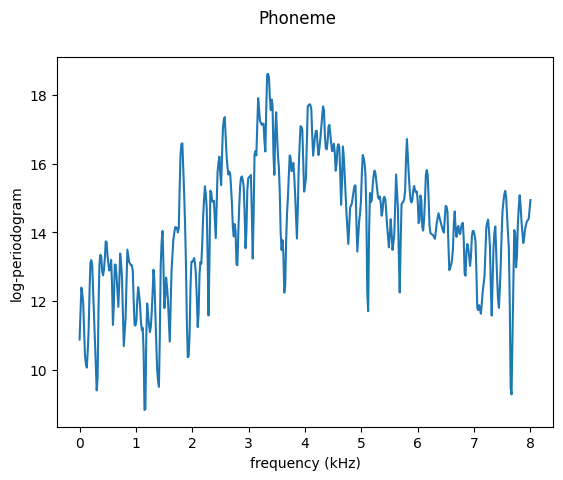

In [29]:
fd[10].plot()
plt.show()

In [30]:
fd_os = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth=1),
).fit_transform(fd)

fd_us = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth=0.05),
).fit_transform(fd)

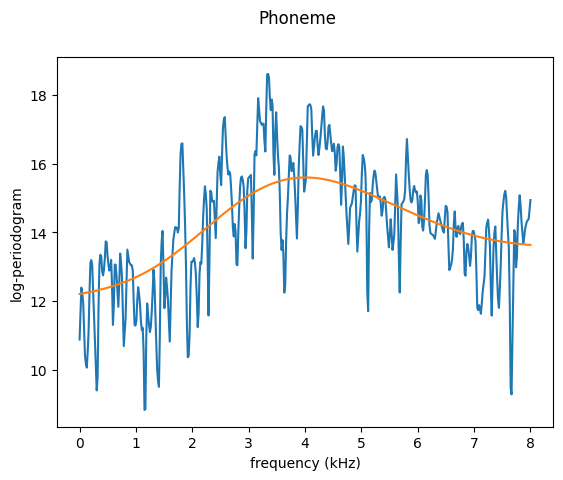

In [31]:
fig = fd[10].plot()
fd_os[10].plot(fig=fig)
plt.show()

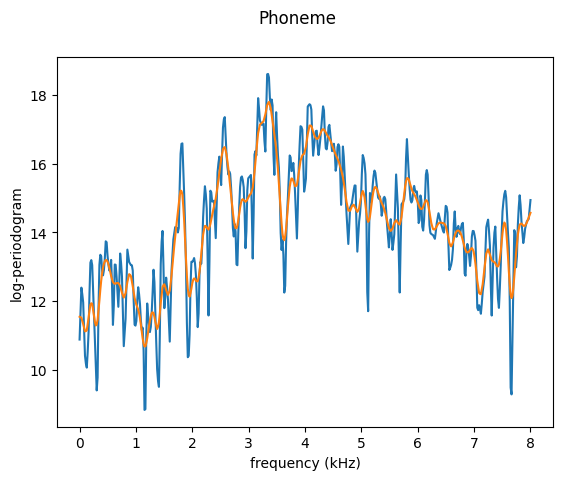

In [32]:
fig = fd[10].plot()
fd_us[10].plot(fig=fig)
plt.show()

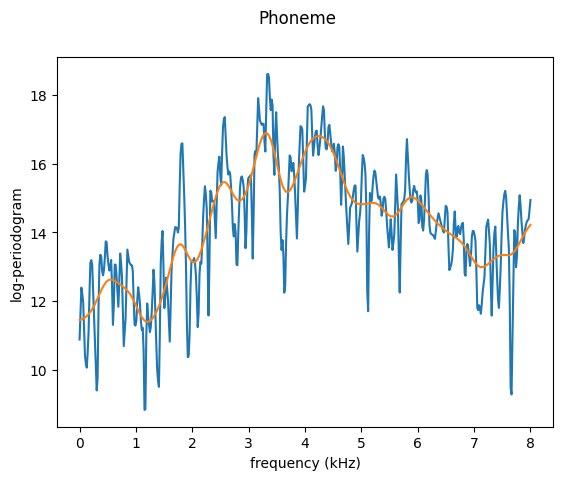

In [41]:
fd_ot = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth=0.15, kernel=normal),
).fit_transform(fd)

fig = fd[10].plot()
fd_ot[10].plot(fig=fig)
plt.show()

In [45]:
fd.grid_points[0][1]

0.03137254901960784

In [47]:
n_neighbors = np.arange(2, 24)
dist = fd.grid_points[0][1] - fd.grid_points[0][0]
bandwidth = np.linspace(
    dist,
    dist * (math.ceil((n_neighbors[-1] - 1) / 2)),
    len(n_neighbors),
)

# K-nearest neighbours kernel smoothing.

knn = SmoothingParameterSearch(
    KernelSmoother(kernel_estimator=KNeighborsHatMatrix()),
    n_neighbors,
    param_name='kernel_estimator__n_neighbors',
)
knn.fit(fd)
knn_fd = knn.transform(fd)

# Local linear regression kernel smoothing.
llr = SmoothingParameterSearch(
    KernelSmoother(kernel_estimator=LocalLinearRegressionHatMatrix()),
    bandwidth,
    param_name='kernel_estimator__bandwidth',
)
llr.fit(fd)
llr_fd = llr.transform(fd)

# Nadaraya-Watson kernel smoothing.
nw = SmoothingParameterSearch(
    KernelSmoother(kernel_estimator=NadarayaWatsonHatMatrix()),
    bandwidth,
    param_name='kernel_estimator__bandwidth',
)
nw.fit(fd)
nw_fd = nw.transform(fd)

In [48]:
type(fd)

skfda.representation.grid.FDataGrid

In [49]:
import matplotlib.pyplot as plt

import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
    FourierBasis,
    MonomialBasis,
)

In [51]:
dataset = skfda.datasets.fetch_growth()
fd = dataset['data']
y = dataset['target']
# fd.plot()

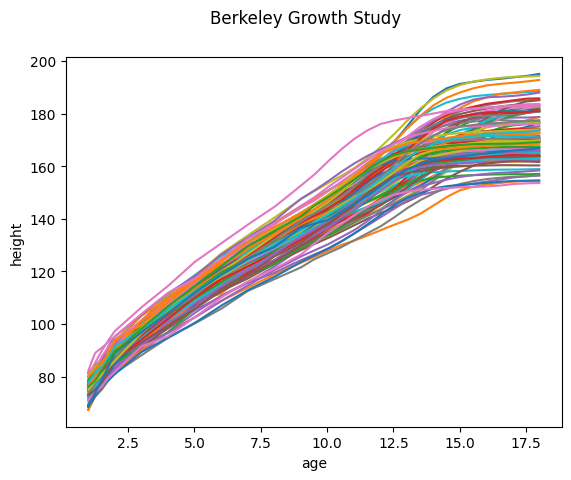

In [53]:
fd.plot()
plt.show()

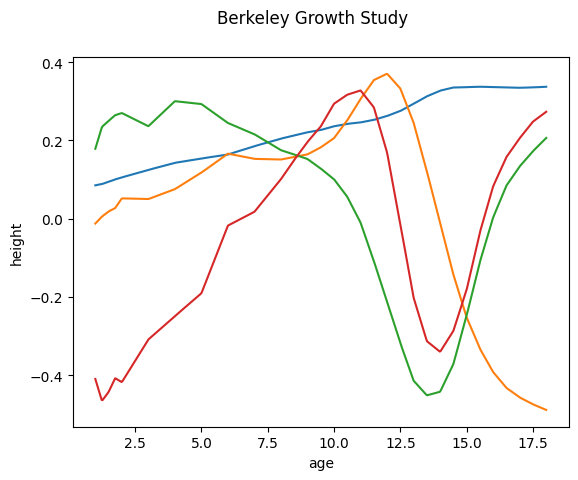

In [57]:
fpca_discretized = FPCA(n_components=4)
fpca_discretized.fit(fd)
fpca_discretized.components_.plot()
plt.show()

In [58]:
fpca_discretized.explained_variance_ratio_

array([0.80996784, 0.13537043, 0.02991788, 0.01145409])

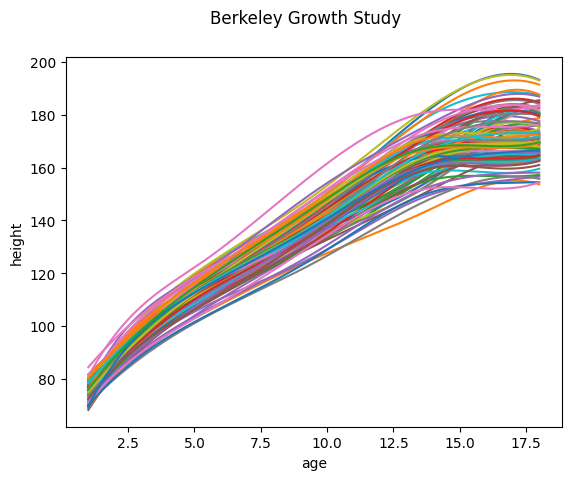

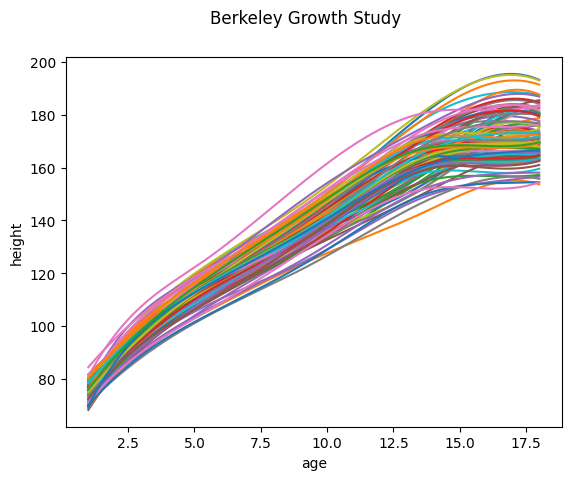

In [59]:
dataset = fetch_growth()
fd = dataset['data']
basis = skfda.representation.basis.BSplineBasis(n_basis=7)
basis_fd = fd.to_basis(basis)
basis_fd.plot()

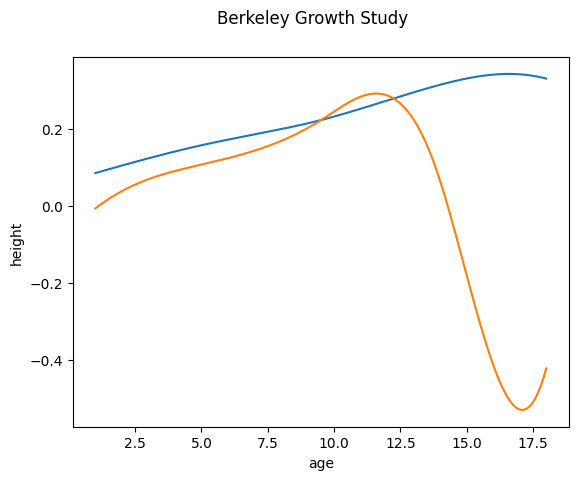

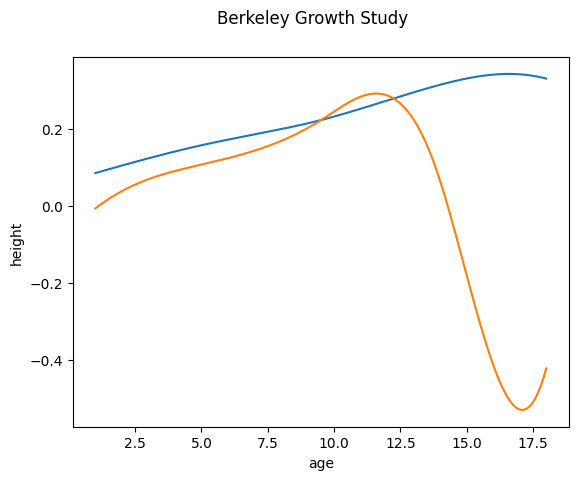

In [60]:
fpca = FPCA(n_components=2)
fpca.fit(basis_fd)
fpca.components_.plot()

In [61]:
fpca.explained_variance_ratio_

array([0.81827598, 0.13471056])